In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import xcp
from xcp import determine_data_fitting_region,calibration_catalog,metadata_dict,advanced_gmvx_plot,template_amp_phase

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from XCP.
(xcp.core)>> Catalog of calibration runs stored to "xcp.calibration_catalog"
(xcp.core)>> Metadata dictionary for calibration runs stored to "xcp.metadata_dict"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"


In [2]:
# --------------------------------------- #
# Preliminaries
# --------------------------------------- #

#Load parameter space fit data
alert('Loading parameter space fit data.')
package_dir = parent( xcp.__path__[0] )
datadir = package_dir + 'data/version2/'
foo_path = datadir+'parameter_space_fits.pickle'
foo = pickle.load( open( foo_path, "rb" ) )

# Load and unpuack physical parameter space
raw_domain = loadtxt(datadir+'fit_initial_binary_parameters.txt')
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2,chi1_x,chi1_y,chi1_z,chi2_x,chi2_y,chi2_z = raw_domain.T

(notebook)>> Loading parameter space fit data.


(notebook)>> mu1


/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1810: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  subplot( spdim+'1' )
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1864: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = ax_array[0] if use_external_axes else subplot(spdim+'1',projection='3d')
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1864: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = ax_array[0] if use_external_axes els

(notebook)>> All done.


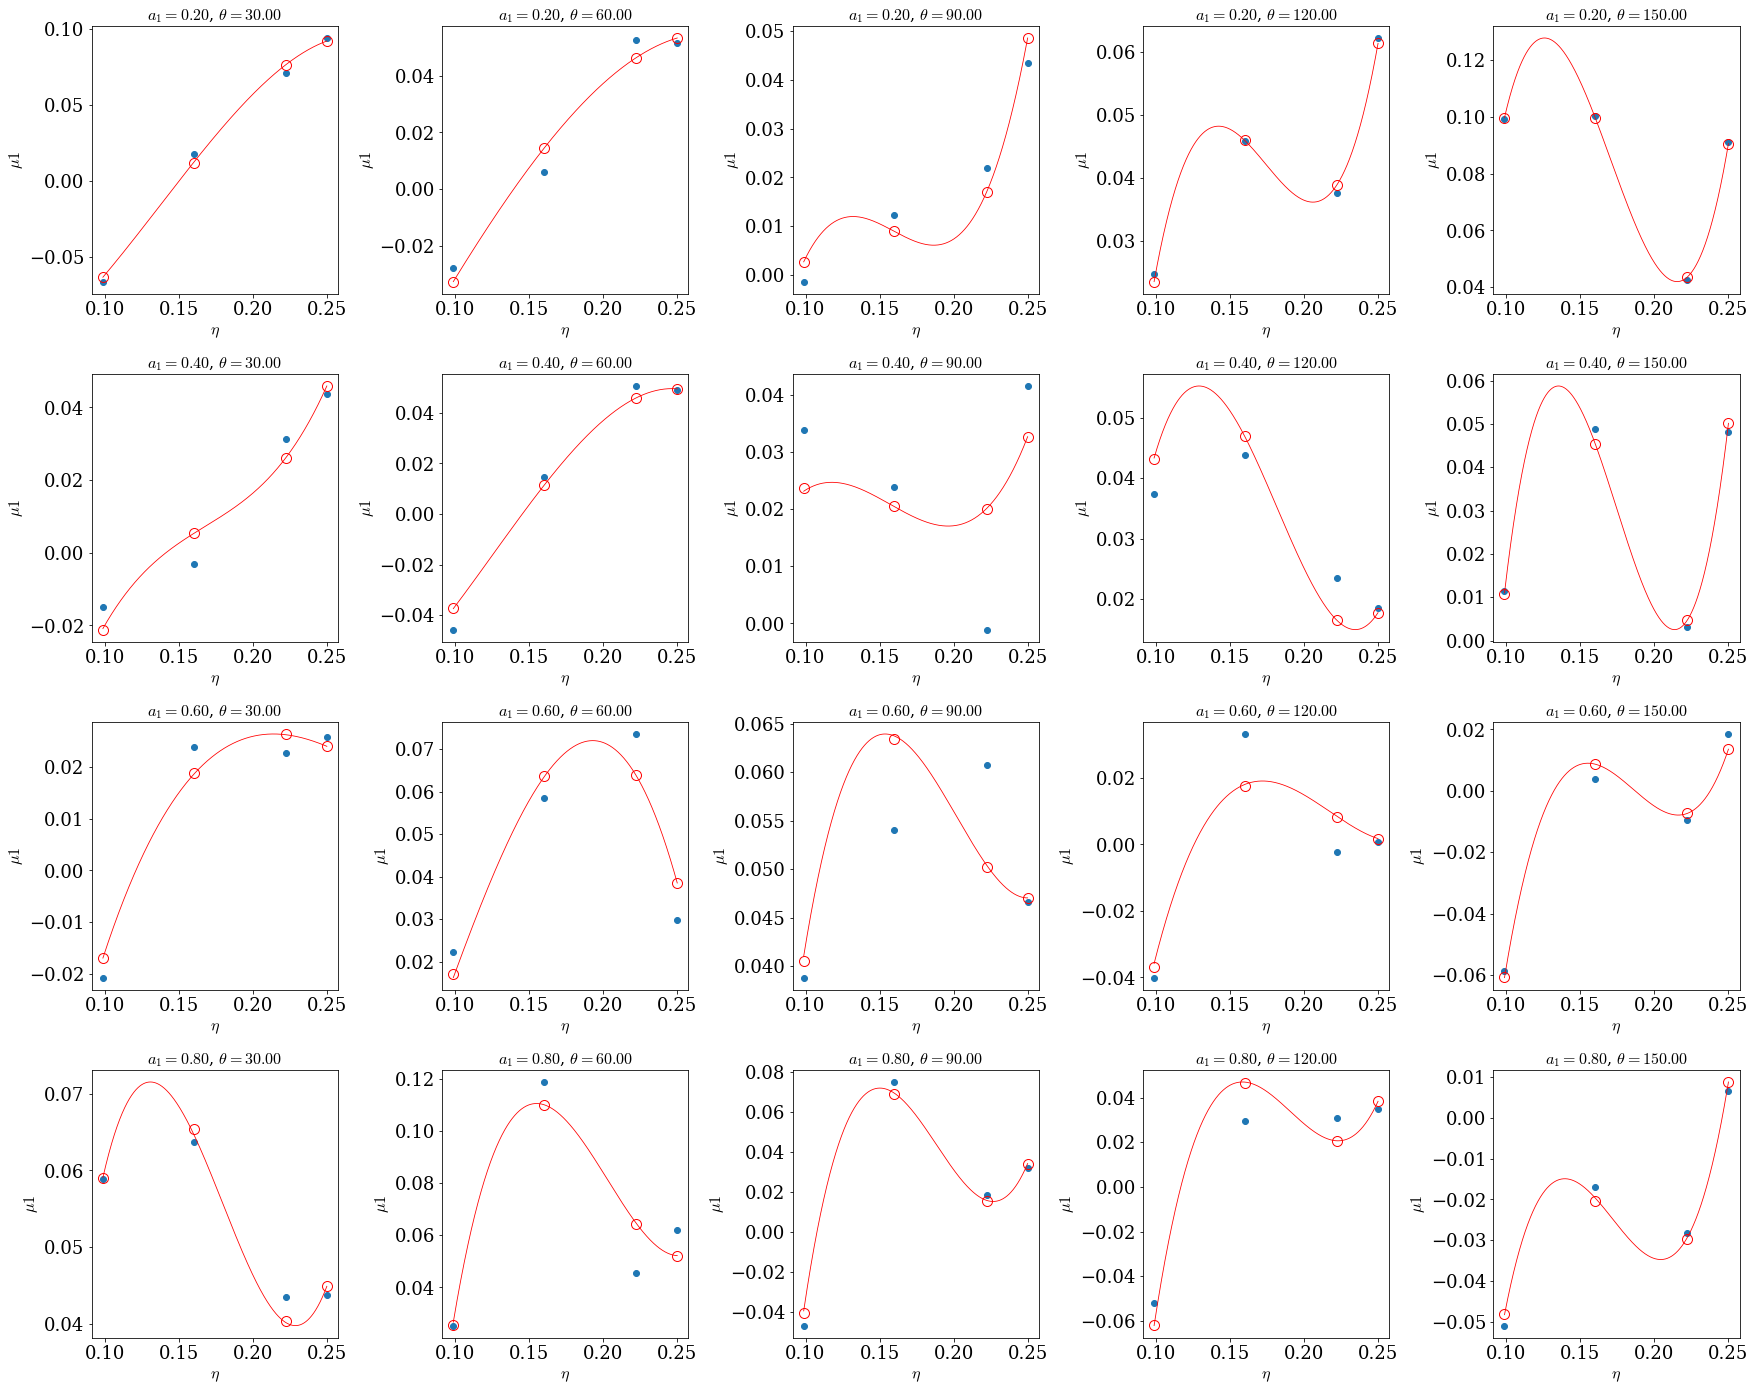

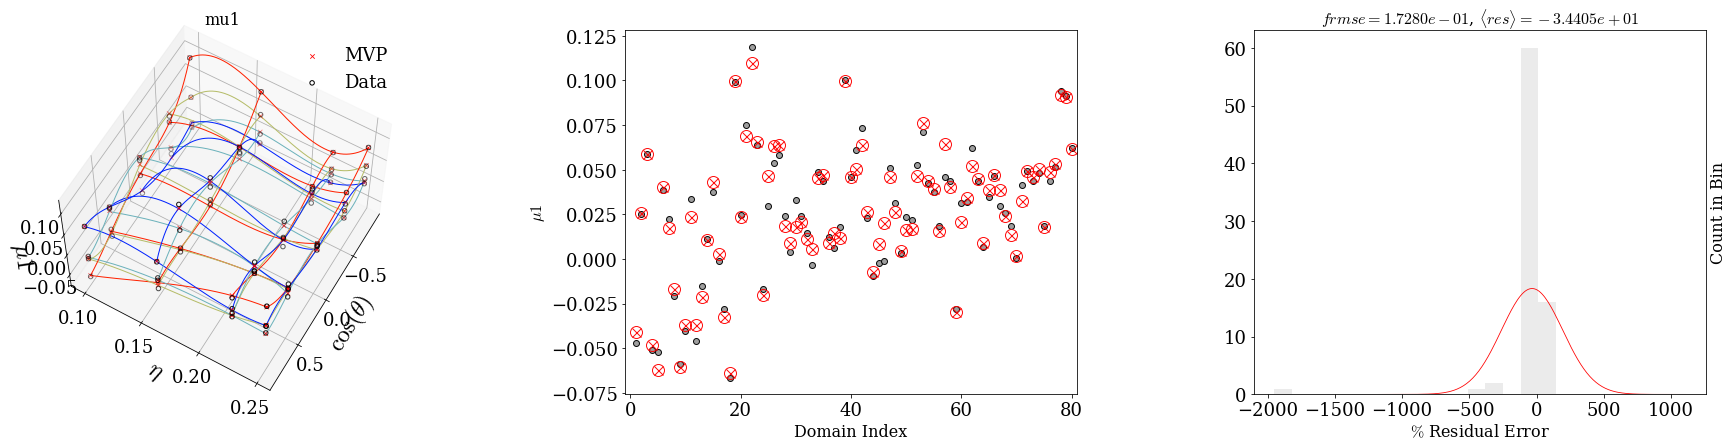

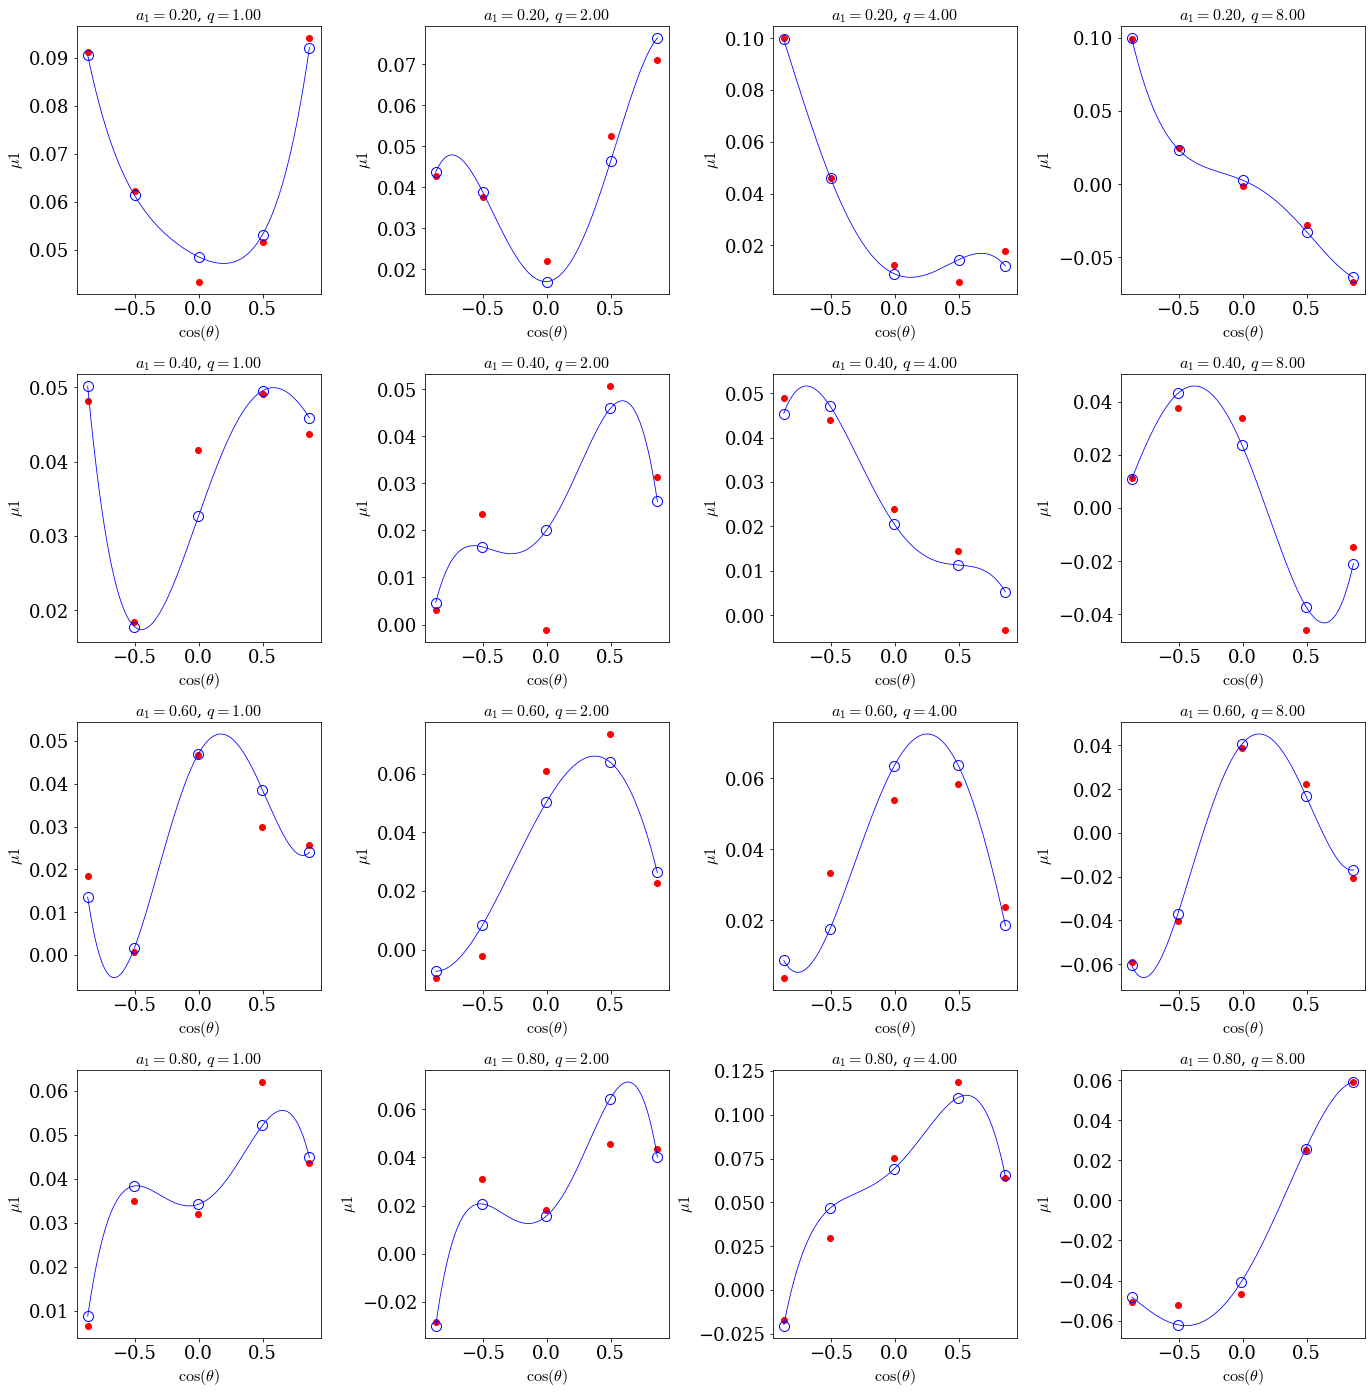

In [3]:
# --------------------------------------- #
# Plot ans save fits 
# --------------------------------------- #

#
scarecrow = template_amp_phase(0.5, 0.5,zeros(3),zeros(3),ell=2)
parameter_names_in_order = scarecrow.__code__.co_varnames[1:scarecrow.__code__.co_argcount]
fit_object = { k:foo[k] for k in parameter_names_in_order }

#
for key in fit_object:
    
    alert(key)
    
    # Summary figure for internal diagnostics 
    fit_object[key].labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
    
    # Generate diagnostic figures
    summary_fig,eta_set_fig,theta_set_fig = advanced_gmvx_plot( fit_object[key] )
            
    break
#     # Save summary figure
#     figure_path = datadir + key+'_fit_diagnostic_1_summary.pdf'
#     alert('Saving diagnostic plot to %s'%magenta(figure_path))
#     summary_fig.savefig( figure_path, pad_inches=0, bbox_inches = 'tight' )
    
#     # Save eta space figure
#     figure_path = datadir + key+'_fit_diagnostic_2_eta_sets.pdf'
#     alert('Saving diagnostic plot to %s'%magenta(figure_path))
#     eta_set_fig.savefig( figure_path, pad_inches=0, bbox_inches = 'tight' )
    
#     # Save theta space figure
#     figure_path = datadir + key+'_fit_diagnostic_3_theta_sets.pdf'
#     alert('Saving diagnostic plot to %s'%magenta(figure_path))
#     theta_set_fig.savefig( figure_path, pad_inches=0, bbox_inches = 'tight' )
    
#     close('all')

#
alert('All done.')

In [4]:
foo = fit_object[key]

/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1810: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  subplot( spdim+'1' )
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1864: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = ax_array[0] if use_external_axes else subplot(spdim+'1',projection='3d')
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1864: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = ax_array[0] if use_external_axes els

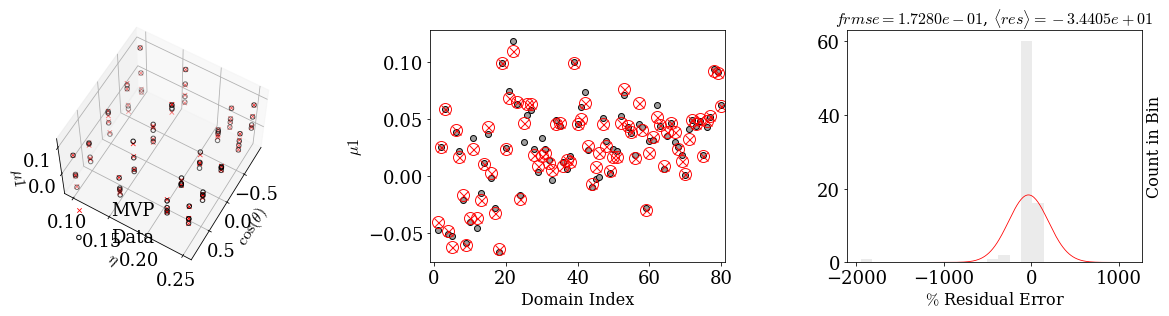

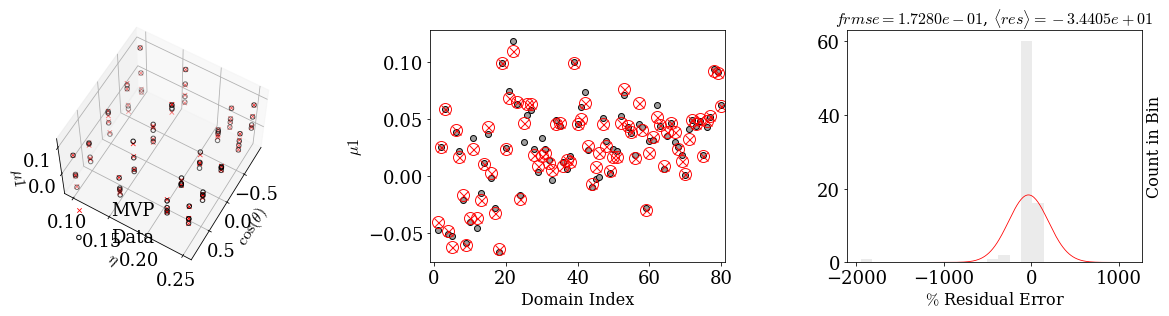

In [5]:
foo.plot()